# Developement model training and testing

In [20]:
import sys
sys.path.append("c:/Users/sebas/Desktop/Travail/E5/Programming for IoT applications/Project/github/IoT-Fire_Detection_System-PoliTo")

In [23]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from datetime import datetime, timedelta

##### Constants

In [ ]:
DATASETSIZE = 52560 #update of the sensor every 10 minutes for 1 year

## Creation of the unified dataset

### Generation of normal synthetic smokes data

In [33]:
# Generation of normale synthetic smokes data with gaussian white noise to imporove model robustness

NOISE_LEVEL = 0.05 # standard deviation of the gaussian noise

smoke_values = np.zeros(DATASETSIZE)

noise = np.random.normal(0.0, NOISE_LEVEL, size=DATASETSIZE)

smoke_values = smoke_values + noise # adding noise to the signal
smoke_values = np.clip(smoke_values, a_min=0.0, a_max=None) # clipping negative values to zero | they are unrealistic

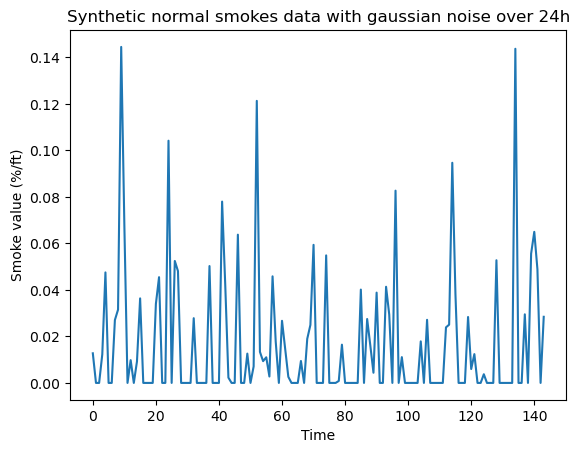

In [57]:
plt.plot(smoke_values[:144])
plt.title("Synthetic normal smokes data with gaussian noise over 24h")
plt.xlabel("Time")
plt.ylabel("Smoke value (%/ft)")
plt.show()

### Generation of normale synthetic CO data

In [35]:
from src.DevicesConnectors.SensorsSimulation.ModelSensor.ModelSensors.COSensorSimulation import COSensorSimulation

co_sensor = COSensorSimulation("./data_set/indoor_data.csv")
co_sensor.trainModel()
co_model = co_sensor.getModel()


In [36]:
START_DATE = datetime(2025, 1, 1)  # first date of the simulation

co_values = []

# Générer les valeurs pour chaque intervalle de 10 minutes
for i in range(DATASETSIZE):
    current_time = START_DATE + timedelta(minutes=10 * i)
    seconds_since_start = (current_time - co_sensor.dataMinTime).total_seconds()

    # Calculer les caractéristiques temporelles
    periode_jour = 24 * 3600
    omega_jour = 2 * np.pi / periode_jour
    Xsin_jour = np.sin(omega_jour * seconds_since_start)
    Xcos_jour = np.cos(omega_jour * seconds_since_start)

    # Ajouter du bruit pour la prédiction
    bruit = np.random.normal(0, 1)
    XNow = np.array([[Xsin_jour, Xcos_jour, bruit]])

    # Prédire la valeur de CO
    co_value = co_model.predict(XNow)[0]
    co_values.append(co_value)

# Convertir la liste en tableau NumPy pour une manipulation plus facile
co_values = np.array(co_values)

# Afficher un aperçu des valeurs générées
print("Aperçu des valeurs générées :", co_values[:10])

Aperçu des valeurs générées : [195.46227819 194.8144494  194.84372063 195.02510933 195.66399749
 195.96237228 196.7630396  197.08261995 197.26143619 197.89782523]


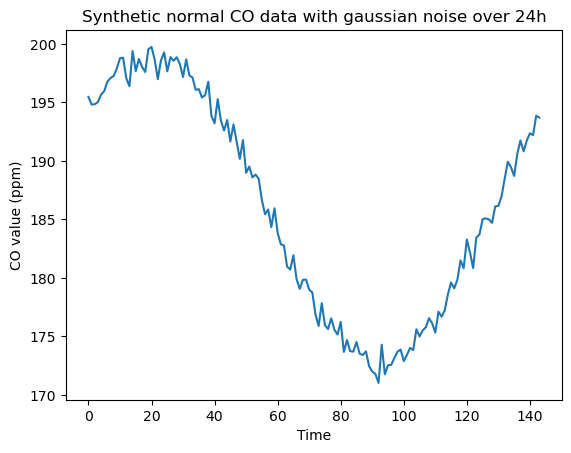

In [56]:
plt.plot(co_values[:144])
plt.title("Synthetic normal CO data with gaussian noise over 24h")
plt.xlabel("Time")
plt.ylabel("CO value (ppm)")
plt.show()

Text(0, 0.5, 'CO value (ppm)')

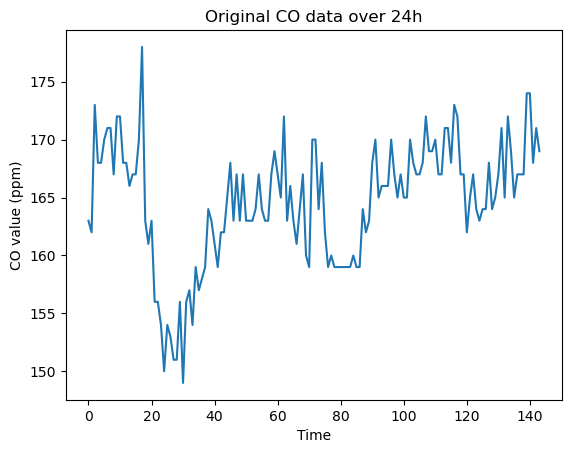

In [72]:
original_data = pd.read_csv("./data_set/indoor_data.csv")
co_data = original_data['field1'].values

plt.plot(co_data[:144])
plt.title("Original CO data over 24h")
plt.xlabel("Time")
plt.ylabel("CO value (ppm)")

### Generation of normal synthetic TVOC data

In [38]:
from src.DevicesConnectors.SensorsSimulation.ModelSensor.ModelSensors.TVOCSensorSimulation import TVOCSensorSimulation

tvoc_sensor = TVOCSensorSimulation("./data_set/indoor_data.csv")
tvoc_sensor.trainModel()
tvoc_model = tvoc_sensor.getModel()

In [39]:
START_DATE = datetime(2025, 1, 1)  # Date de début de la simulation

tvoc_values = []

# Générer les valeurs pour chaque intervalle de 10 minutes
for i in range(DATASETSIZE):
    current_time = START_DATE + timedelta(minutes=10 * i)
    seconds_since_start = (current_time - tvoc_sensor.dataMinTime).total_seconds()

    # Calculer les caractéristiques temporelles
    periode_jour = 24 * 3600
    omega_jour = 2 * np.pi / periode_jour
    Xsin_jour = np.sin(omega_jour * seconds_since_start)
    Xcos_jour = np.cos(omega_jour * seconds_since_start)

    # Ajouter du bruit pour la prédiction
    bruit = np.random.normal(0, 1)
    XNow = np.array([[Xsin_jour, Xcos_jour, bruit]])

    # Prédire la valeur de TVOC
    tvoc_value = tvoc_model.predict(XNow)[0]
    tvoc_values.append(tvoc_value)

# Convertir la liste en tableau NumPy pour une manipulation plus facile
tvoc_values = np.array(tvoc_values)

# Afficher un aperçu des valeurs générées
print("Aperçu des valeurs générées :", tvoc_values[:10])

Aperçu des valeurs générées : [43.00539014 42.94714937 43.00400321 43.08121257 43.23374526 43.31766891
 43.48486247 43.5580043  43.59841632 43.71394781]


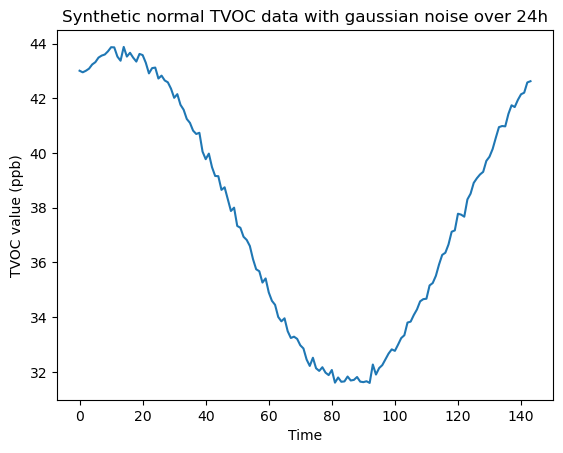

In [58]:
plt.plot(tvoc_values[:144])
plt.title("Synthetic normal TVOC data with gaussian noise over 24h")
plt.xlabel("Time")
plt.ylabel("TVOC value (ppb)")
plt.show()

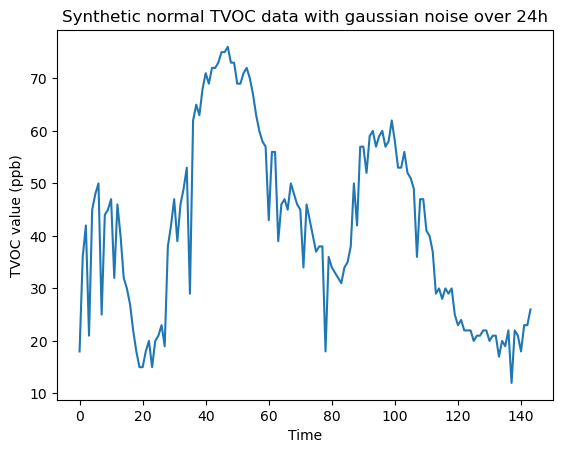

In [71]:
original_data = pd.read_csv("./data_set/indoor_data.csv")
tvoc_data = original_data['field6'].values

plt.plot(tvoc_data[:144])
plt.title("Synthetic normal TVOC data with gaussian noise over 24h")
plt.xlabel("Time")
plt.ylabel("TVOC value (ppb)")
plt.show()

### Generation of synthetic temperature data

In [41]:
from src.DevicesConnectors.SensorsSimulation.ModelSensor.ModelSensors.TemperatureSensorSimulation import TemperatureSensorSimulation

temperature_sensor = TemperatureSensorSimulation("./data_set/OFFC_EMY.csv")
temperature_sensor.trainModel()
temperature_model = temperature_sensor.getModel()

In [43]:
START_DATE = datetime(2025, 1, 1)  # Date de début de la simulation

temperature_values = []

# Générer les valeurs pour chaque intervalle de 10 minutes
for i in range(DATASETSIZE):
    current_time = START_DATE + timedelta(minutes=10 * i)
    seconds_since_start = (current_time - temperature_sensor.dataMinTime).total_seconds()

    # Calculer les caractéristiques temporelles annuelles et journalières
    periode_annuelle = 365 * 24 * 3600
    periode_journalière = 24 * 3600
    omega_annuelle = 2 * np.pi / periode_annuelle
    omega_journalière = 2 * np.pi / periode_journalière

    Xsin_annuelle = np.sin(omega_annuelle * seconds_since_start)
    Xcos_annuelle = np.cos(omega_annuelle * seconds_since_start)
    Xsin_journalière = np.sin(omega_journalière * seconds_since_start)
    Xcos_journalière = np.cos(omega_journalière * seconds_since_start)

    # Ajouter du bruit pour la prédiction
    bruit = np.random.normal(0, 0.5)
    XNow = np.array([[Xsin_annuelle, Xcos_annuelle, Xsin_journalière, Xcos_journalière, bruit]])

    # Prédire la valeur de température
    temperature_value = temperature_model.predict(XNow)[0]
    temperature_values.append(temperature_value)

# Convertir la liste en tableau NumPy pour une manipulation plus facile
temperature_values = np.array(temperature_values)

# Afficher un aperçu des valeurs générées
print("Aperçu des valeurs générées :", temperature_values[:10])

Aperçu des valeurs générées : [2.22935386 2.8626365  2.75608144 2.93168709 2.8016493  2.93796079
 2.54655966 2.75252303 2.03885495 2.55502411]


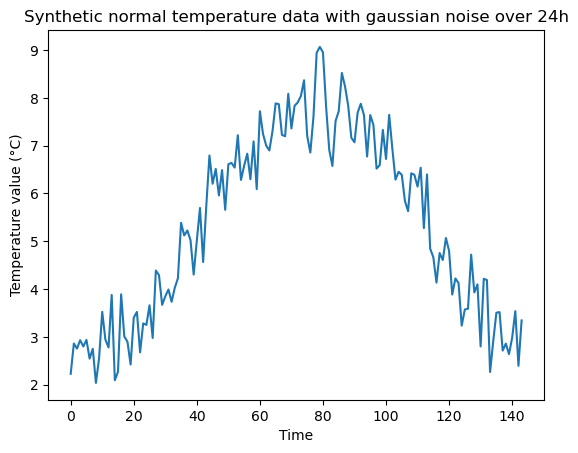

In [59]:
plt.plot(temperature_values[:144])
plt.title("Synthetic normal temperature data with gaussian noise over 24h")
plt.xlabel("Time")
plt.ylabel("Temperature value (°C)")
plt.show()

### Unified dataset creation

In [45]:
dataset = pd.DataFrame({
    'smoke': smoke_values,
    'co': co_values,
    'tvoc': tvoc_values,
    'temperature': temperature_values
})
# With smoke values in %/ft, co values in ppm, tvoc values in ppb and temperature values in °C

with open('synthetic_sensor_data_1y_10min_update.csv', 'w') as f:
    dataset.to_csv(f, index=False)

### Finale représentation plot of the dataset

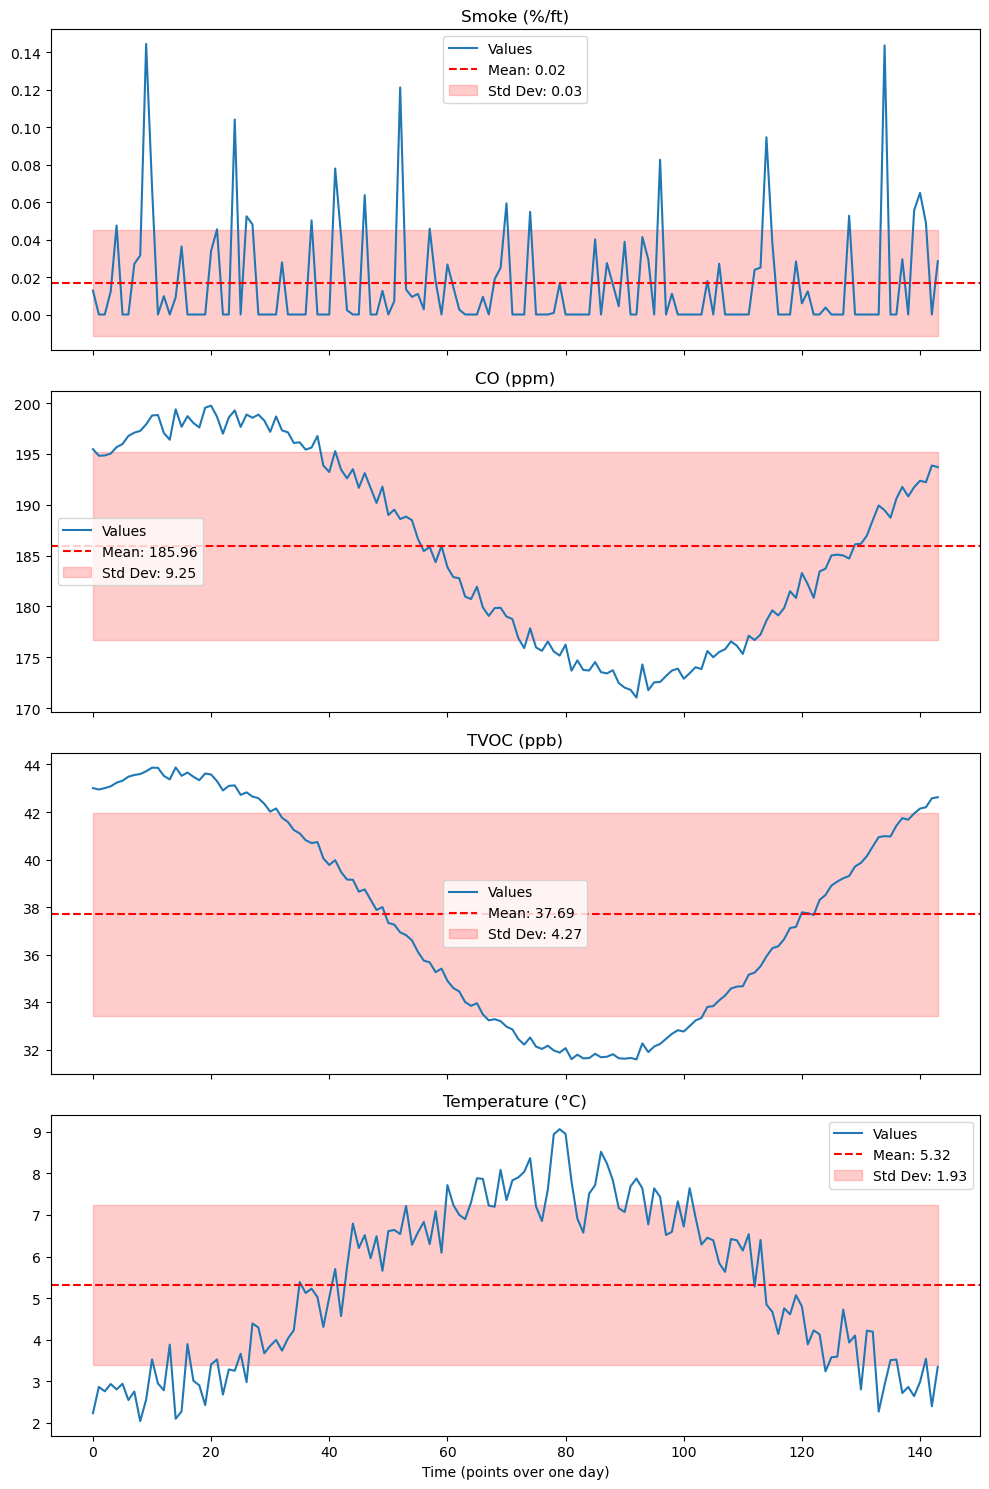

In [48]:
# Filter data for a single day (144 points, as 144 * 10 minutes = 1 day)
DAY_POINTS = 144
smoke_day = smoke_values[:DAY_POINTS]
co_day = co_values[:DAY_POINTS]
tvoc_day = tvoc_values[:DAY_POINTS]
temperature_day = temperature_values[:DAY_POINTS]

# Calculate statistics
smoke_mean, smoke_std = np.mean(smoke_day), np.std(smoke_day)
co_mean, co_std = np.mean(co_day), np.std(co_day)
tvoc_mean, tvoc_std = np.mean(tvoc_day), np.std(tvoc_day)
temperature_mean, temperature_std = np.mean(temperature_day), np.std(temperature_day)

# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 15), sharex=True)

# Plot data for each sensor
time = np.arange(DAY_POINTS)  # X-axis: time points

# Smoke
axs[0].plot(time, smoke_day, label="Values")
axs[0].axhline(smoke_mean, color='r', linestyle='--', label=f"Mean: {smoke_mean:.2f}")
axs[0].fill_between(time, smoke_mean - smoke_std, smoke_mean + smoke_std, color='r', alpha=0.2, label=f"Std Dev: {smoke_std:.2f}")
axs[0].set_title("Smoke (%/ft)")
axs[0].legend()

# CO
axs[1].plot(time, co_day, label="Values")
axs[1].axhline(co_mean, color='r', linestyle='--', label=f"Mean: {co_mean:.2f}")
axs[1].fill_between(time, co_mean - co_std, co_mean + co_std, color='r', alpha=0.2, label=f"Std Dev: {co_std:.2f}")
axs[1].set_title("CO (ppm)")
axs[1].legend()

# TVOC
axs[2].plot(time, tvoc_day, label="Values")
axs[2].axhline(tvoc_mean, color='r', linestyle='--', label=f"Mean: {tvoc_mean:.2f}")
axs[2].fill_between(time, tvoc_mean - tvoc_std, tvoc_mean + tvoc_std, color='r', alpha=0.2, label=f"Std Dev: {tvoc_std:.2f}")
axs[2].set_title("TVOC (ppb)")
axs[2].legend()

# Temperature
axs[3].plot(time, temperature_day, label="Values")
axs[3].axhline(temperature_mean, color='r', linestyle='--', label=f"Mean: {temperature_mean:.2f}")
axs[3].fill_between(time, temperature_mean - temperature_std, temperature_mean + temperature_std, color='r', alpha=0.2, label=f"Std Dev: {temperature_std:.2f}")
axs[3].set_title("Temperature (°C)")
axs[3].legend()

# Adjust labels and display
plt.xlabel("Time (points over one day)")
plt.tight_layout()
plt.show()

## Generation of model training and testing code for anomaly detection

In [46]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import joblib

n = DATASETSIZE
np.random.seed(42)

dataset = pd.read_csv('synthetic_sensor_data_1y_10min_update.csv')

print("✅ Dataset chargé :", dataset.shape)

scaler = StandardScaler()

X_train = scaler.fit_transform(dataset)

print("⏳ Entraînement de l'Isolation Forest en cours...")

model = IsolationForest(n_estimators=100, contamination=0.001, random_state=42)

model.fit(X_train)

print("🎉 Modèle entraîné avec succès !")

joblib.dump(model, 'model/modele_incendie.pkl')
joblib.dump(scaler, 'model/scaler_incendie.pkl')
print("💾 Modèle et Scaler sauvegardés dans le dossier.")

print("\n--- TEST DE VALIDATION ---")

def tester_valeurs(smoke, co, tvoc, temp):
    # 1. Créer un mini dataframe
    data = pd.DataFrame([[smoke, co, tvoc, temp]], 
                        columns=['smoke', 'co', 'tvoc', 'temperature'])
    # 2. Appliquer le MÊME scaling que pour l'entraînement
    data_scaled = scaler.transform(data)
    # 3. Predire
    pred = model.predict(data_scaled)[0]
    
    status = "✅ NORMAL" if pred == 1 else "🔥 ANOMALIE (FEU)"
    print(f"Entrées: Smoke={smoke}, CO={co}, TVOC={tvoc}, Temp={temp} -> {status}")

# Test 1 : Valeurs normales
tester_valeurs(smoke=0.05, co=2.1, tvoc=32, temp=23)

# Test 2 : Début d'incendie (Smoke monte, CO monte)
tester_valeurs(smoke=0.8, co=15, tvoc=100, temp=28)

✅ Dataset chargé : (3153600, 4)
⏳ Entraînement de l'Isolation Forest en cours...
🎉 Modèle entraîné avec succès !
💾 Modèle et Scaler sauvegardés dans le dossier.

--- TEST DE VALIDATION ---
Entrées: Smoke=0.05, CO=2.1, TVOC=32, Temp=23 -> ✅ NORMAL
Entrées: Smoke=0.8, CO=15, TVOC=100, Temp=28 -> 🔥 ANOMALIE (FEU)


### Test and validation code

In [67]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

# Générer 100 points normaux à partir du générateur de données normal
normal_data = []
for _ in range(100):
    # Générer des caractéristiques temporelles normales
    smoke = np.random.normal(0.05, 0.02)  # Smoke (%/ft)
    co = np.random.normal(2, 0.5)         # CO (ppm)
    tvoc = np.random.normal(30, 10)       # TVOC (ppb)
    temperature = np.random.normal(22, 2) # Température (°C)
    normal_data.append([smoke, co, tvoc, temperature])

# Générer 100 points anormaux
anomalous_data = []
for _ in range(100):
    # Commencer avec des valeurs normales
    smoke = np.random.normal(0.05, 0.02)
    co = np.random.normal(2, 0.5)
    tvoc = np.random.normal(30, 10)
    temperature = np.random.normal(22, 2)
    
    # Sélectionner aléatoirement combien de capteurs seront modifiés (1 à 4)
    num_anomalous_sensors = np.random.randint(1, 5)
    sensors_to_modify = np.random.choice(['smoke', 'co', 'tvoc', 'temperature'], size=num_anomalous_sensors, replace=False)
    
    # Appliquer des valeurs anormales aux capteurs sélectionnés
    if 'smoke' in sensors_to_modify:
        smoke = np.random.uniform(0.5, 1.0)  # Smoke (%/ft) - valeurs très élevées
    if 'co' in sensors_to_modify:
        co = np.random.uniform(10, 20)       # CO (ppm) - valeurs très élevées
    if 'tvoc' in sensors_to_modify:
        tvoc = np.random.uniform(100, 300)   # TVOC (ppb) - valeurs très élevées
    if 'temperature' in sensors_to_modify:
        temperature = np.random.uniform(30, 50)  # Température (°C) - valeurs très élevées
    
    anomalous_data.append([smoke, co, tvoc, temperature])

# Combiner les données normales et anormales
data = np.vstack([normal_data, anomalous_data])
labels = np.array([1] * 100 + [0] * 100)  # 1 = normal, 0 = anomalie

# Créer un DataFrame
test_dataset = pd.DataFrame(data, columns=['smoke', 'co', 'tvoc', 'temperature'])
test_dataset['label'] = labels

# Appliquer le scaler utilisé pour l'entraînement
X_test = scaler.transform(test_dataset[['smoke', 'co', 'tvoc', 'temperature']])

# Prédire avec le modèle
predictions = model.predict(X_test)

# Calculer l'accuracy
accuracy = accuracy_score(test_dataset['label'], (predictions == 1).astype(int))
print(f"Accuracy of the model: {accuracy:.2f}")

# Visualiser les résultats
#print("\nSample predictions:")
#print(test_dataset.head(10))

print("\nlabels 1 (normal):")
print(test_dataset[test_dataset['label'] == 1].head(5))
print("\nlabels 0 (anomalous):")
print(test_dataset[test_dataset['label'] == 0].head(5))

print("Failed to detect some anomalies in the test set :")
# Trouver les indices où le modèle a échoué
failed_predictions = test_dataset[(predictions == 1) & (test_dataset['label'] == 0)]  # Faux négatifs (anomalies non détectées)
false_positives = test_dataset[(predictions == -1) & (test_dataset['label'] == 1)]  # Faux positifs (normaux détectés comme anomalies)

# Afficher les résultats
print("Faux négatifs (anomalies non détectées) :")
print(failed_predictions)

print("\nFaux positifs (normaux détectés comme anomalies) :")
print(false_positives)

# Compter les erreurs
print(f"\nNombre total de faux négatifs : {len(failed_predictions)}")
print(f"Nombre total de faux positifs : {len(false_positives)}")

Accuracy of the model: 0.89

labels 1 (normal):
      smoke        co       tvoc  temperature  label
0  0.074039  2.004394  30.578640    21.468815      1
1  0.063689  1.789401  39.764314    19.735702      1
2  0.028022  2.343713  29.114558    21.092217      1
3  0.067801  1.696369  27.997987    24.798456      1
4  0.080783  2.786199  27.178742    24.461406      1

labels 0 (anomalous):
        smoke         co        tvoc  temperature  label
100  0.770015   1.820521  192.206714    36.517803      0
101  0.098529   1.712705  292.352496    21.147346      0
102  0.085510   1.260402  204.163117    22.130049      0
103  0.067534  16.173543  180.982163    23.284731      0
104  0.084793   2.042642  208.836023    19.826049      0
Failed to detect some anomalies in the test set :
Faux négatifs (anomalies non détectées) :
        smoke         co        tvoc  temperature  label
105  0.045917  19.326457   29.879564    19.758465      0
109  0.054580   1.990568   22.719029    30.312866      0
111  0

### Grpahique representation of the dataset

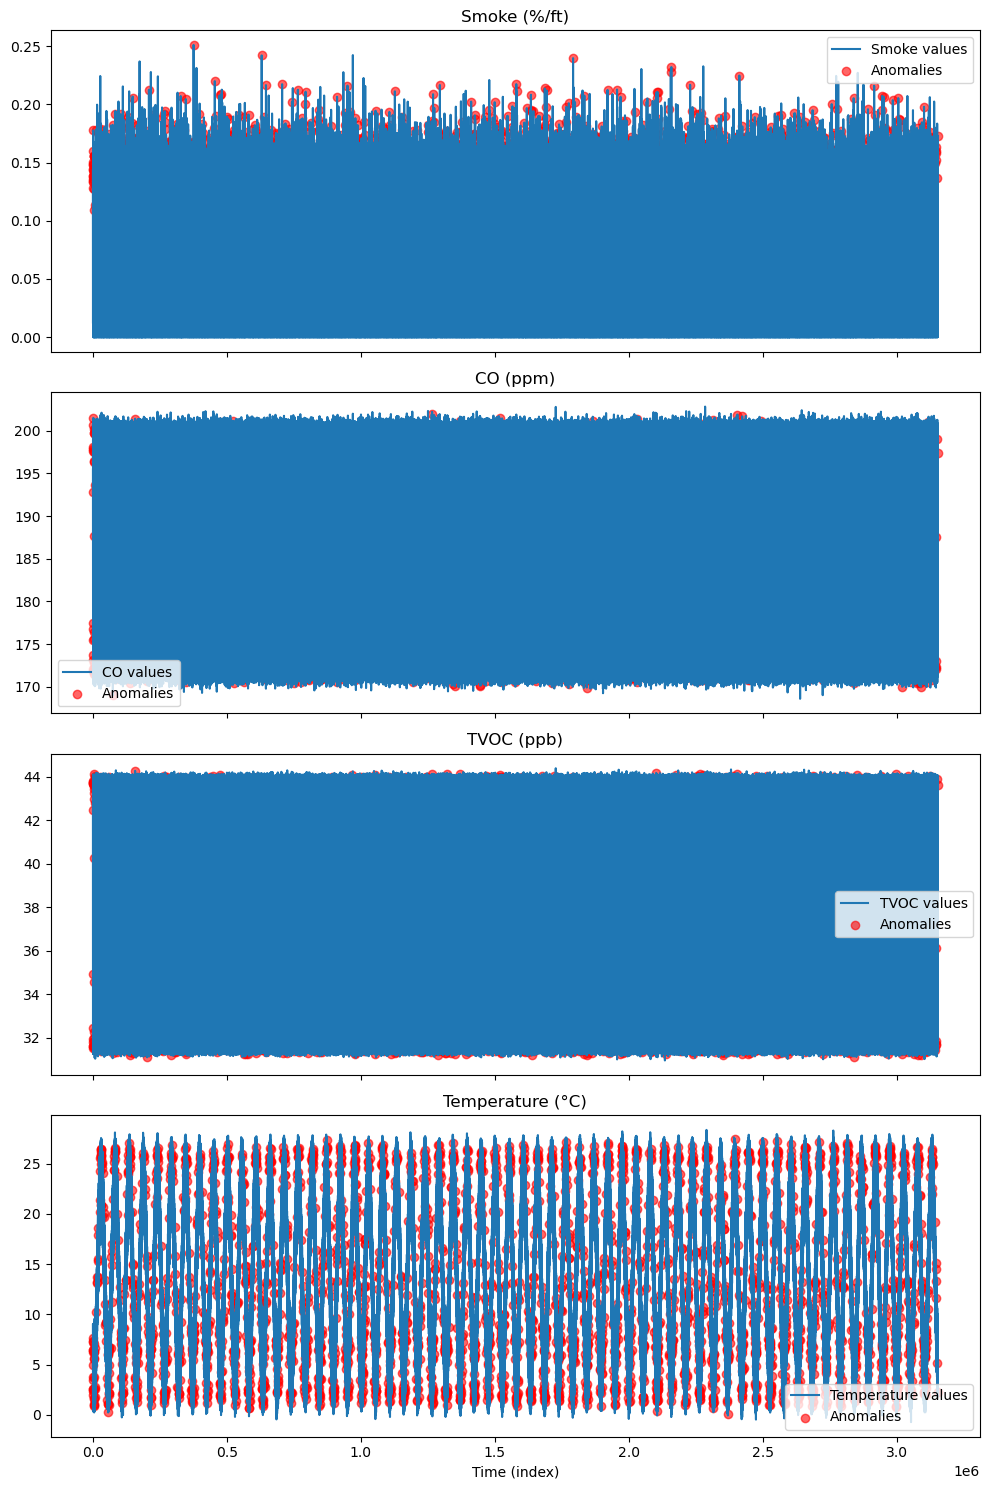

In [49]:
# Ajouter les prédictions du modèle (1 = normal, -1 = anomalie)
dataset['prediction'] = model.predict(X_train)

# Filtrer les anomalies
anomalies = dataset[dataset['prediction'] == -1]

# Tracer les données avec les anomalies
fig, axs = plt.subplots(4, 1, figsize=(10, 15), sharex=True)

# Smoke
axs[0].plot(dataset.index, dataset['smoke'], label="Smoke values")
axs[0].scatter(anomalies.index, anomalies['smoke'], color='r', label="Anomalies", alpha=0.6)
axs[0].set_title("Smoke (%/ft)")
axs[0].legend()

# CO
axs[1].plot(dataset.index, dataset['co'], label="CO values")
axs[1].scatter(anomalies.index, anomalies['co'], color='r', label="Anomalies", alpha=0.6)
axs[1].set_title("CO (ppm)")
axs[1].legend()

# TVOC
axs[2].plot(dataset.index, dataset['tvoc'], label="TVOC values")
axs[2].scatter(anomalies.index, anomalies['tvoc'], color='r', label="Anomalies", alpha=0.6)
axs[2].set_title("TVOC (ppb)")
axs[2].legend()

# Temperature
axs[3].plot(dataset.index, dataset['temperature'], label="Temperature values")
axs[3].scatter(anomalies.index, anomalies['temperature'], color='r', label="Anomalies", alpha=0.6)
axs[3].set_title("Temperature (°C)")
axs[3].legend()

plt.xlabel("Time (index)")
plt.tight_layout()
plt.show()

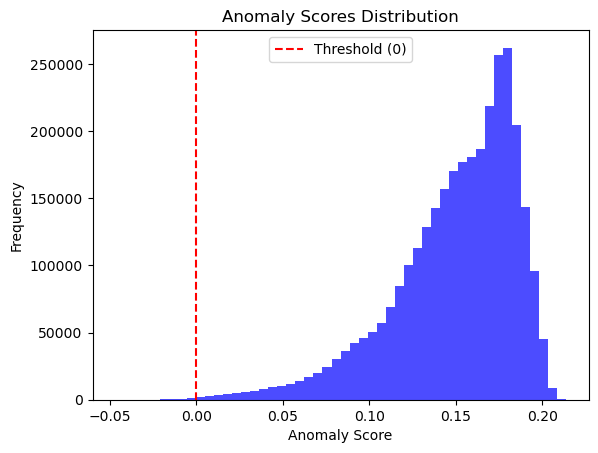

In [50]:
# Calculer les scores d'anomalie
anomaly_scores = model.decision_function(X_train)

# Tracer l'histogramme des scores
plt.hist(anomaly_scores, bins=50, color='blue', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', label="Threshold (0)")
plt.title("Anomaly Scores Distribution")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

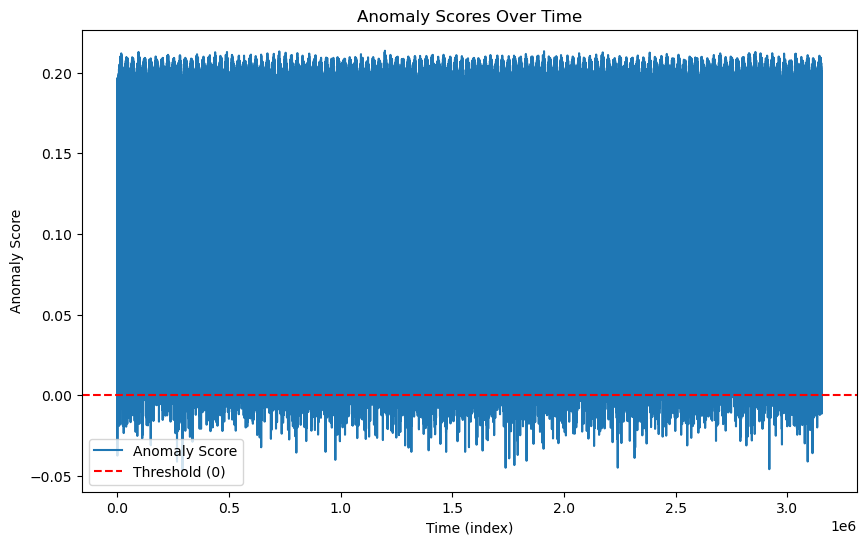

In [51]:
# Ajouter les scores d'anomalie au dataset
dataset['anomaly_score'] = anomaly_scores

# Tracer les scores d'anomalie pour chaque capteur
plt.figure(figsize=(10, 6))
plt.plot(dataset.index, dataset['anomaly_score'], label="Anomaly Score")
plt.axhline(y=0, color='red', linestyle='--', label="Threshold (0)")
plt.title("Anomaly Scores Over Time")
plt.xlabel("Time (index)")
plt.ylabel("Anomaly Score")
plt.legend()
plt.show()

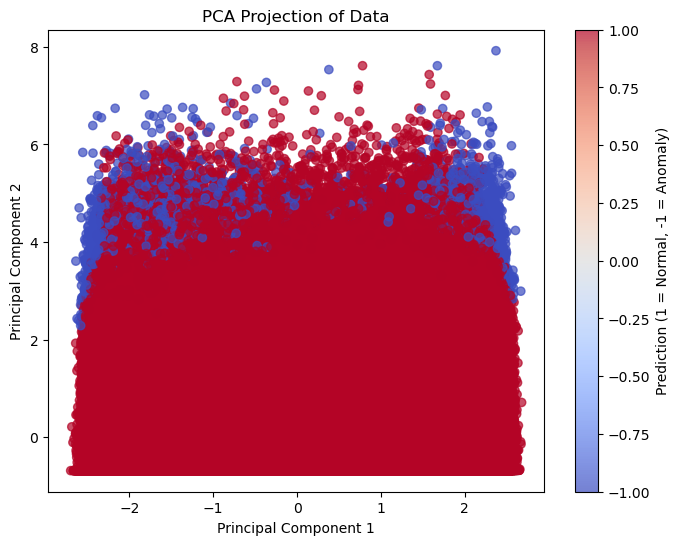

In [52]:
from sklearn.decomposition import PCA

# Réduction à 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Tracer les données projetées
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dataset['prediction'], cmap='coolwarm', alpha=0.7)
plt.title("PCA Projection of Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Prediction (1 = Normal, -1 = Anomaly)")
plt.show()